In [71]:
import numpy as np

import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [72]:
file = './/attachments//ha_temp_16_20251003_235057_808832832.png'
# file = './/attachments//ha_temp_16_20251004_235227_988573636.png'

In [73]:
tick_labels = {
    15: np.array([
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0]
    ]),
    20: np.array([
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]),
    40: np.array([
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 0, 0]
    ])
}


residual = lambda x, y: np.sum(np.abs(x - y))

In [74]:
img = mpimg.imread(file)

gray = img[..., :3].mean(axis=2)

line_mask = (gray > 0.6) * 1

tick_label = line_mask[56:65, 30:37]

# tick_label

(np.float64(-0.5), np.float64(6.5), np.float64(8.5), np.float64(-0.5))

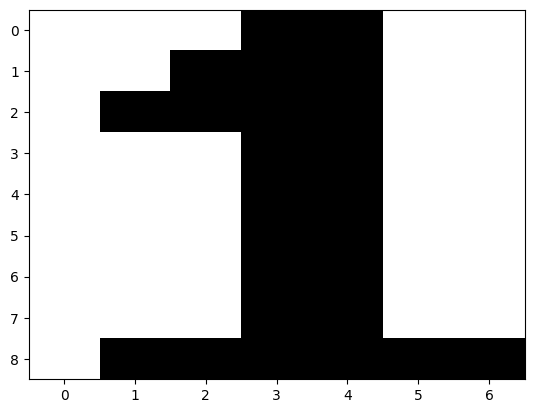

In [75]:
plt.imshow(tick_label, cmap='gray')
plt.axis('equal')
plt.axis('tight')

In [76]:
y_max = min(tick_labels, key=lambda k: residual(tick_label, tick_labels[k]))

if y_max == 15:
    y_min = -5
else:
    y_min = 0

residual(tick_label, tick_labels[y_max])

np.int64(0)

In [77]:
zero_mask = (line_mask == 0)
line_y = zero_mask.argmax(axis=0).astype(float)
line_y[~zero_mask.any(axis=0)] = np.nan

# convert pixels to values
# y-pixel 267 corresponds to temperature y_min
# y-pixel  66 corresponds to temperature y_max
temp = (line_y[49:-26] - 267) * (y_max - y_min) / (66 - 267) + y_min

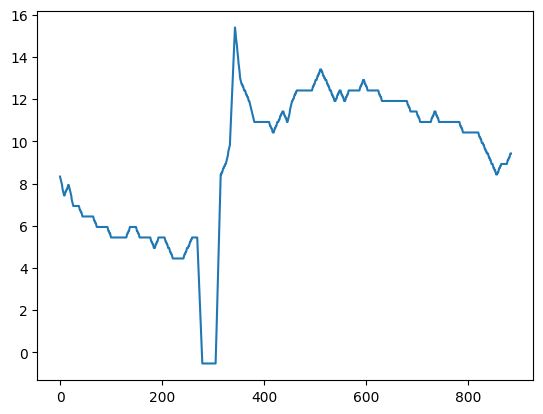

In [78]:
plt.plot(temp)

(np.float64(-0.5), np.float64(959.5), np.float64(299.5), np.float64(-0.5))

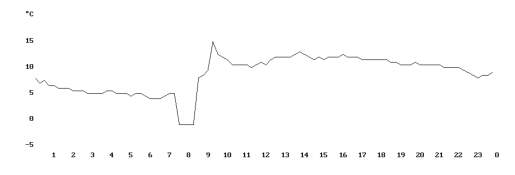

In [79]:
plt.imshow(line_mask, cmap='gray')
plt.axis('off')